# **🔹 專案大綱**

## **📌 什麼是 RUL（剩餘壽命）？**
RUL 是指一個設備或零件**在完全失效（壞掉）之前**，還能夠運作的時間長度。例如：
- **電動車電池**：還能用多久？  
- **工業機械設備**：何時需要維修？  
- **渦輪引擎 / 發電機**：多久後會故障？  
---

## **📌 RUL 預測的應用場景**
1. **智慧製造（Smart Manufacturing）**
   - 監測生產設備，提前維修，降低維修成本。
   - 例如：工廠中的機械手臂、CNC 機台、電動馬達等。

2. **電動車（EV）**
   - 預測電池健康狀態，提升續航能力。
   - 例如：電動巴士、電動車的電池模組壽命管理。

3. **航空航太（Aerospace）**
   - 監測飛機渦輪引擎，確保安全飛行。
   - 例如：NASA C-MAPSS 數據集，就是用來預測飛機引擎剩餘壽命。

---

## **📌 RUL 預測的方法**
1. **機器學習（ML）**
   - 適合有大量已標註 RUL 數據的情況，例如：
     - **Random Forest**
     - **XGBoost**
     - **SVR（Support Vector Regression）**

2. **深度學習（DL）**
   - 適合處理**時間序列數據**（即，設備狀態隨時間變化），例如：
     - **LSTM（長短期記憶網路）**
     - **CNN（卷積神經網路）**
     - **Transformer（自注意力機制）**

---


# **🔹  使用kaggle數據集**
[NASA Turbofan Jet Engine Data Set]https://www.kaggle.com/datasets/behrad3d/nasa-cmaps)

---

# **🔹 技術棧**  
- **數據處理**：`pandas`、`numpy`、`scikit-learn`  
- **機器學習**：`RandomForestRegressor`（隨機森林）  
- **深度學習**：`PyTorch / TensorFlow`（CNN）  
- **模型部署**：`Flask` / `FastAPI`  

---


# **🔹  專案詳細步驟**
## **1️⃣ 數據處理**
📌 **目標**：將原始 `.txt` 檔案轉換為適用於模型訓練的 DataFrame  

🔹 **步驟**
1. 讀取 **`train_FD001.txt`** 和 **`test_FD001.txt`**  
2. 讀取 RUL 標籤 **`RUL_FD001.txt`**  
3. 清理數據（刪除空白列）  
4. 添加 RUL 標籤  

📌 **程式碼**


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 讀取數據
train_path = "/kaggle/input/nasa-cmaps/CMaps/train_FD001.txt"
test_path = "/kaggle/input/nasa-cmaps/CMaps/test_FD001.txt"
rul_path = "/kaggle/input/nasa-cmaps/CMaps/RUL_FD001.txt"

# 設定固定列名
column_names = ['unit', 'time'] + [f'sensor_{i}' for i in range(1, 22)]

# 讀取數據文件
train_data = pd.read_csv(train_path, sep=" ", header=None, names=column_names, engine='python')
test_data = pd.read_csv(test_path, sep=" ", header=None, names=column_names, engine='python')
rul_data = pd.read_csv(rul_path, header=None, names=['RUL'])

# 顯示數據的前幾行，看看數據長什麼樣子
print(train_data.head())
print(test_data.head())

                             unit    time  sensor_1  sensor_2  sensor_3  \
1 1 -0.0007 -0.0004 100.0  518.67  641.82   1589.70   1400.60     14.62   
  2  0.0019 -0.0003 100.0  518.67  642.15   1591.82   1403.14     14.62   
  3 -0.0043  0.0003 100.0  518.67  642.35   1587.99   1404.20     14.62   
  4  0.0007  0.0000 100.0  518.67  642.35   1582.79   1401.87     14.62   
  5 -0.0019 -0.0002 100.0  518.67  642.37   1582.85   1406.22     14.62   

                           sensor_4  sensor_5  sensor_6  sensor_7  sensor_8  \
1 1 -0.0007 -0.0004 100.0     21.61    554.36   2388.06   9046.19       1.3   
  2  0.0019 -0.0003 100.0     21.61    553.75   2388.04   9044.07       1.3   
  3 -0.0043  0.0003 100.0     21.61    554.26   2388.08   9052.94       1.3   
  4  0.0007  0.0000 100.0     21.61    554.45   2388.11   9049.48       1.3   
  5 -0.0019 -0.0002 100.0     21.61    554.00   2388.06   9055.15       1.3   

                           ...  sensor_12  sensor_13  sensor_14  sensor_15

In [2]:
# 清理數據（去掉空白列）
train_data.dropna(axis=1, how='all', inplace=True)
test_data.dropna(axis=1, how='all', inplace=True)

# 顯示清理後的數據
print(train_data.head())

                             unit    time  sensor_1  sensor_2  sensor_3  \
1 1 -0.0007 -0.0004 100.0  518.67  641.82   1589.70   1400.60     14.62   
  2  0.0019 -0.0003 100.0  518.67  642.15   1591.82   1403.14     14.62   
  3 -0.0043  0.0003 100.0  518.67  642.35   1587.99   1404.20     14.62   
  4  0.0007  0.0000 100.0  518.67  642.35   1582.79   1401.87     14.62   
  5 -0.0019 -0.0002 100.0  518.67  642.37   1582.85   1406.22     14.62   

                           sensor_4  sensor_5  sensor_6  sensor_7  sensor_8  \
1 1 -0.0007 -0.0004 100.0     21.61    554.36   2388.06   9046.19       1.3   
  2  0.0019 -0.0003 100.0     21.61    553.75   2388.04   9044.07       1.3   
  3 -0.0043  0.0003 100.0     21.61    554.26   2388.08   9052.94       1.3   
  4  0.0007  0.0000 100.0     21.61    554.45   2388.11   9049.48       1.3   
  5 -0.0019 -0.0002 100.0     21.61    554.00   2388.06   9055.15       1.3   

                           ...  sensor_10  sensor_11  sensor_12  sensor_13

In [3]:
# 計算 RUL（剩餘壽命）(RUL 的計算方法是每個設備的最大運行時間減去它當前的運行時間)
train_data['RUL'] = train_data.groupby('unit')['time'].transform(lambda x: x.max() - x)

# 顯示數據的前幾行，檢查 RUL 是否計算正確
print(train_data.head())

                             unit    time  sensor_1  sensor_2  sensor_3  \
1 1 -0.0007 -0.0004 100.0  518.67  641.82   1589.70   1400.60     14.62   
  2  0.0019 -0.0003 100.0  518.67  642.15   1591.82   1403.14     14.62   
  3 -0.0043  0.0003 100.0  518.67  642.35   1587.99   1404.20     14.62   
  4  0.0007  0.0000 100.0  518.67  642.35   1582.79   1401.87     14.62   
  5 -0.0019 -0.0002 100.0  518.67  642.37   1582.85   1406.22     14.62   

                           sensor_4  sensor_5  sensor_6  sensor_7  sensor_8  \
1 1 -0.0007 -0.0004 100.0     21.61    554.36   2388.06   9046.19       1.3   
  2  0.0019 -0.0003 100.0     21.61    553.75   2388.04   9044.07       1.3   
  3 -0.0043  0.0003 100.0     21.61    554.26   2388.08   9052.94       1.3   
  4  0.0007  0.0000 100.0     21.61    554.45   2388.11   9049.48       1.3   
  5 -0.0019 -0.0002 100.0     21.61    554.00   2388.06   9055.15       1.3   

                           ...  sensor_11  sensor_12  sensor_13  sensor_14


---

## **2️⃣ 特徵工程**
📌 **目標**：建立適合機器學習的數據集  

🔹 **步驟**
1. **移動平均特徵**（用 5 個時間步長做平滑）  
2. **標準化感測器數據**  

📌 **程式碼**

In [4]:
# 檢查缺失值
print(train_data.isnull().sum())
print(test_data.isnull().sum())


unit         0
time         0
sensor_1     0
sensor_2     0
sensor_3     0
sensor_4     0
sensor_5     0
sensor_6     0
sensor_7     0
sensor_8     0
sensor_9     0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_15    0
sensor_16    0
sensor_17    0
sensor_18    0
sensor_19    0
RUL          0
dtype: int64
unit         0
time         0
sensor_1     0
sensor_2     0
sensor_3     0
sensor_4     0
sensor_5     0
sensor_6     0
sensor_7     0
sensor_8     0
sensor_9     0
sensor_10    0
sensor_11    0
sensor_12    0
sensor_13    0
sensor_14    0
sensor_15    0
sensor_16    0
sensor_17    0
sensor_18    0
sensor_19    0
dtype: int64


In [5]:
# 填充缺失值
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)


In [6]:
from sklearn.preprocessing import StandardScaler

# 生成特移動平均徵
for sensor in [f'sensor_{i}' for i in range(1, 20)]:
    train_data[sensor + '_mean'] = train_data[sensor].rolling(5).mean()

# 標準化
scaler = StandardScaler()
sensor_features = [f'sensor_{i}' for i in range(1, 20)]
train_data[sensor_features] = scaler.fit_transform(train_data[sensor_features])


---

## **3️⃣ 隨機森林（機器學習模型）**
📌 **目標**：使用 **隨機森林** 預測 RUL  

🔹 **步驟**
1. 建立 `RandomForestRegressor`  
2. 訓練模型  
3. 評估模型（MSE, RMSE, R²）  

📌 **程式碼**

In [7]:
# 選擇感測器特徵作為 X（輸入）
sensor_features = [f'sensor_{i}' for i in range(1, 20)] + [f'sensor_{i}_mean' for i in range(1, 20)]
X = train_data[sensor_features]

# 設定 y（目標標籤，RUL）
y = train_data.groupby('unit')['time'].transform(max) - train_data['time']


In [8]:
from sklearn.model_selection import train_test_split

# 80% 訓練, 20% 測試
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"訓練集大小: {X_train.shape}, 測試集大小: {X_test.shape}")


訓練集大小: (16504, 38), 測試集大小: (4127, 38)


In [9]:
print(X_train.isnull().sum().sum())  # 計算 NaN 總數
print(X_test.isnull().sum().sum())


38
38


In [10]:
# 用均值填補 NaN
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


In [11]:
from sklearn.ensemble import RandomForestRegressor

# 建立隨機森林模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 訓練模型
rf_model.fit(X_train, y_train)

print("隨機森林模型訓練完成！")


隨機森林模型訓練完成！


In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# 預測測試集
y_pred = rf_model.predict(X_test)

# 計算 MSE（均方誤差）
mse = mean_squared_error(y_test, y_pred)

# 計算 RMSE（均方根誤差）
rmse = mean_squared_error(y_test, y_pred, squared=False)

# 計算 R²（決定係數）
r2 = r2_score(y_test, y_pred)

print(f"隨機森林模型的 MSE: {mse}")
print(f"隨機森林模型的 RMSE: {rmse}")
print(f"隨機森林模型的 R²: {r2}")


隨機森林模型的 MSE: 0.09723922108068744
隨機森林模型的 RMSE: 0.3118320398558933
隨機森林模型的 R²: 0.6106563464316525



---

## **4️⃣ CNN（深度學習模型）**
📌 **目標**：使用 **CNN** 預測 RUL  

🔹 **步驟**
1. 設計 CNN 架構  
2. 訓練模型  
3. 評估模型  

📌 **程式碼（TensorFlow/Keras）**


In [13]:
# CNN 資料預處理，窗口化（Sliding Window）
import numpy as np

def create_sequences(X, y, time_steps=5):
    X_seq, y_seq = [], []
    # 確保 y 的索引連續
    y = y.reset_index(drop=True) if hasattr(y, "reset_index") else y
    for i in range(len(X) - time_steps):
        X_seq.append(X[i: i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

# 如果 X_train 和 X_test 是 DataFrame，將其轉換為 NumPy 陣列
X_train = X_train.to_numpy() if hasattr(X_train, 'to_numpy') else X_train
X_test = X_test.to_numpy() if hasattr(X_test, 'to_numpy') else X_test

time_steps = 10  # 窗口大小
X_train_seq, y_train_seq = create_sequences(X_train, y_train, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, time_steps)

# 確保輸入形狀正確 (樣本數, 時間步長, 特徵數)
print(X_train_seq.shape, X_test_seq.shape)  # 應該是 (樣本數, 10, 特徵數)


(16494, 10, 38) (4117, 10, 38)


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [15]:
# CNN模型架構
# 定義 CNN 模型

model = Sequential([
    Conv1D(256, kernel_size=5, activation='relu', padding='same', input_shape=(time_steps, X_train_seq.shape[2])),
    Conv1D(128, kernel_size=3, activation='relu', padding='same'),
    Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])


# 編譯模型
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])

# 顯示模型結構
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 10, 256)             │          48,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 10, 128)             │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 10, 64)              │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 640)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          82,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 262,337 (1.00 MB)

 Trainable params: 262,337 (1.00 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# 訓練 CNN
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=50, batch_size=32,
    validation_data=(X_test_seq, y_test_seq),
    verbose=1
)


Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 15813.5400 - mae: 38.5553 - val_loss: 5.9338 - val_mae: 2.3435
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 24.8150 - mae: 3.4116 - val_loss: 23.7575 - val_mae: 4.8340
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 36.8903 - mae: 4.4004 - val_loss: 90.9194 - val_mae: 9.5158
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 32.5636 - mae: 3.7795 - val_loss: 0.3622 - val_mae: 0.4757
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 6.7220 - mae: 1.9903 - val_loss: 2.1394 - val_mae: 1.3472
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 9.5146 - mae: 2.4195 - val_loss: 8.8544 - val_mae: 2.9258
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 9.8071 - mae: 2.4911 - val_loss: 11.9401 - val_mae: 3.4142
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 152.7701 - mae: 2.9530 - val_loss: 146.9935 - val_mae: 12.1135
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 

In [17]:
# 預測測試集
y_pred_cnn = model.predict(X_test_seq)

# 計算 MSE、RMSE、R²
mse_cnn = mean_squared_error(y_test_seq, y_pred_cnn)
rmse_cnn = np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test_seq, y_pred_cnn)

# 輸出結果
print(f"CNN 模型的 MSE: {mse_cnn}")
print(f"CNN 模型的 RMSE: {rmse_cnn}")
print(f"CNN 模型的 R²: {r2_cnn}")


129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
CNN 模型的 MSE: 0.24972954927192645
CNN 模型的 RMSE: 0.4997294760887399
CNN 模型的 R²: -3.5046747932643285e-06


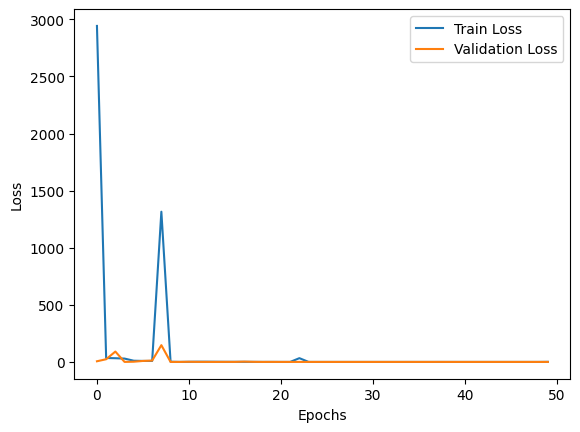

In [18]:
# 觀察 Loss 變化
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



---

## **5️⃣ 模型部署（Flask / FastAPI）**
📌 **目標**：使用 Flask 部署模型  

📌 **程式碼**
```python
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)
model = joblib.load("rf_model.pkl")

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json['features']
    prediction = model.predict([data])
    return jsonify({"RUL Prediction": prediction.tolist()})

app.run(debug=True)

## 6. **簡報與GitHub專案**
- 在 Kaggle Notebook 中，你可以創建可重現的分析過程，並將其保存為Notebook文件。
- 可以將這些步驟整理成簡報，展示你如何進行數據預處理、模型建立、性能評估等。
- 在 GitHub 上創建一個專案，將你的代碼和結果分享給其他人。